# Machine Learning Classification Demo
by Angie Shia

### We will use Logistic Regression, Random Forest and SVM algorithms to demonstrate classification. Dataset used is a bank product solication dataset donated to UCI online ML dataset in 2018.


Data Description:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

20 Attributes (input parameters) with one outcome of Yes/No.

For more information on the dataset, see https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

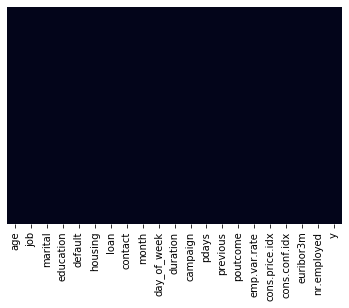

In [2]:
#Show data cleaning

bank_df = pd.read_csv('bank-additional-full.csv',sep=';')

#this shows missing data as color stripes. Since it is solid color, there is no missing data.
sns.heatmap(bank_df.isnull(),yticklabels=False,cbar=False)  


In [3]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# We will rename the last column, which is the target column from 'y' to 'Sold'

bank_df.rename(columns = {'y':'Sold'}, inplace = True) 

In [5]:
# we recheck and see the target column name has changed
bank_df.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Sold
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


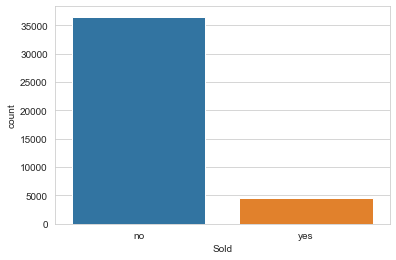

In [6]:
# We plot the target column and see most of the campaign was not succesful.

sns.set_style('whitegrid')
sns.countplot(x='Sold',data=bank_df)

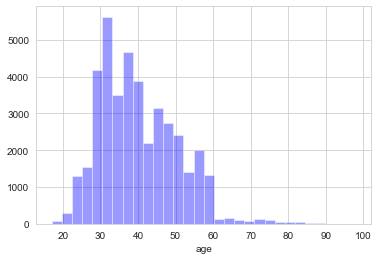

In [7]:
# We see the target audience is around late 20s to 50 in age.

sns.distplot(bank_df['age'].dropna(),kde=False,color='blue',bins=30)

In [8]:
# We can't do pair plot in reasonable time
#sns.pairplot(bank_df,hue='Sold',palette='Set1')

In [9]:
#Let's see what data type we can dealing with
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
Sold              41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
#We need to convert data into one-hot encoding as most regression algorithms cannot handle categorical value.
#In our first data pruning, there are only some categorical ones that does not seems promising so we will drop (e.g. default) 

bank_df.drop(['default'],axis=1,inplace=True)

#convert to one-hot. Notice some one prefix as the categories have the same value = yes/No. this can create duplicate
#column names. So we add a prefix to distinguish them.

marital = pd.get_dummies(bank_df['marital'],drop_first=True)
job = pd.get_dummies(bank_df['job'],drop_first=True)
education = pd.get_dummies(bank_df['education'],drop_first=True)
housing = pd.get_dummies(bank_df['housing'],drop_first=True, prefix='housing')
loan = pd.get_dummies(bank_df['loan'],drop_first=True, prefix='loan')
contact = pd.get_dummies(bank_df['contact'],drop_first=True, prefix='contact')
month = pd.get_dummies(bank_df['month'],drop_first=True)
day_of_week = pd.get_dummies(bank_df['day_of_week'],drop_first=True)
poutcome = pd.get_dummies(bank_df['poutcome'],drop_first=True)



In [11]:
#drop original categorical columns
bank_df.drop(['marital','job','education','housing','loan','contact','month','day_of_week','poutcome'],axis=1,inplace=True)

#merge new data with remaining bank
bank_df = pd.concat([bank_df,marital,job,education,housing,loan,contact,month,day_of_week,poutcome],axis=1)

In [12]:
#let's reexamine the data. 
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
age                    41188 non-null int64
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
Sold                   41188 non-null object
married                41188 non-null uint8
single                 41188 non-null uint8
unknown                41188 non-null uint8
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8


In [13]:
# We take a look how data looks after one-hot encoding. We will show last 20 columns

bank_df.iloc[:,32:].head()

#double checking they are all numeric
#bank_df.iloc[:,20:31].head()


,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,aug,dec,jul,jun,mar,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [14]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
age                    41188 non-null int64
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
Sold                   41188 non-null object
married                41188 non-null uint8
single                 41188 non-null uint8
unknown                41188 non-null uint8
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8


In [15]:

#we now separate out the input parameters (aka attributes) from the target
input_params = bank_df.drop('Sold',axis=1)   #everything except the target column success
target = bank_df['Sold']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_params,target,test_size=0.30,random_state=101)

## Train ML algorithms

In [17]:
# We will need this for all the algorithms
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
#logistic regression (classifier) - 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#We see the prediction by LogRegression is quite good for 'no' but terrible for 'yes'.
#One factor is that there are far more samples for 'no' than for 'yes'

predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10978
         yes       0.66      0.39      0.49      1379

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [20]:
# From the confusion matrix, we see high number of false negative. Once again, the 
#most likely factor is that the algorithm sees a lot of 'no' samples, so it just keep returning no.

print(confusion_matrix(y_test,predictions))

[[10699   279]
 [  840   539]]


In [21]:
#KNN
#Need to normalize data first. Use standard Scaler



In [22]:
#RF and GBT

In [23]:
#SVM. 
#Use gridsearch CV to find the optimal C, gmma and kernel parameters for SVM.

## Show confusion matrix and heatmap